In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('monthly-cola-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly cola production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly cola production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly cola production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [7]:
df.head()

,Month,Monthly cola production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [8]:
df['Month']

0     1956-01-01
1     1956-02-01
2     1956-03-01
3     1956-04-01
4     1956-05-01
         ...    
471   1995-04-01
472   1995-05-01
473   1995-06-01
474   1995-07-01
475   1995-08-01
Name: Month, Length: 476, dtype: datetime64[ns]

In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.head()

,Monthly cola production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: xlabel='Month', ylabel='Monthly cola production'>

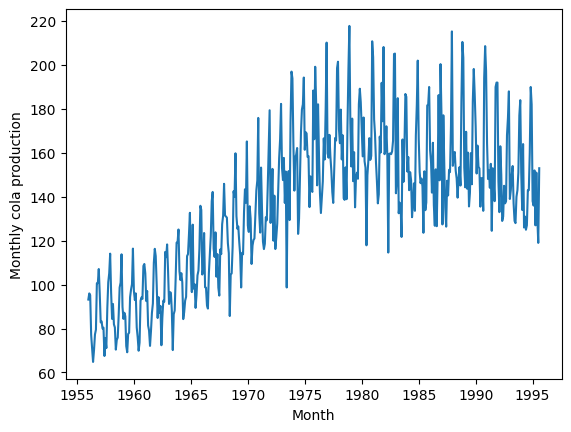

In [11]:
sns.lineplot(data = df, x=df.index, y= df['Monthly cola production'])

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose


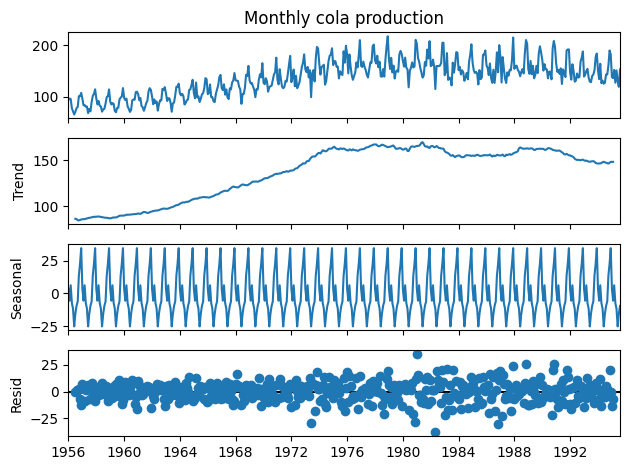

In [13]:
decomposition = seasonal_decompose(df['Monthly cola production'],period=12)
fig = decomposition.plot()

In [14]:
df['rollMean'] = df['Monthly cola production'].rolling(window=12).mean()
df['rollStd'] = df['Monthly cola production'].rolling(window=12).std()

In [15]:
print(df['rollMean'])
print(df['rollStd'])

Month
1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
                 ...    
1995-04-01    146.166667
1995-05-01    147.833333
1995-06-01    148.250000
1995-07-01    147.583333
1995-08-01    148.416667
Name: rollMean, Length: 476, dtype: float64
Month
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
                ...    
1995-04-01    21.391729
1995-05-01    20.875533
1995-06-01    20.423360
1995-07-01    21.292160
1995-08-01    21.292160
Name: rollStd, Length: 476, dtype: float64


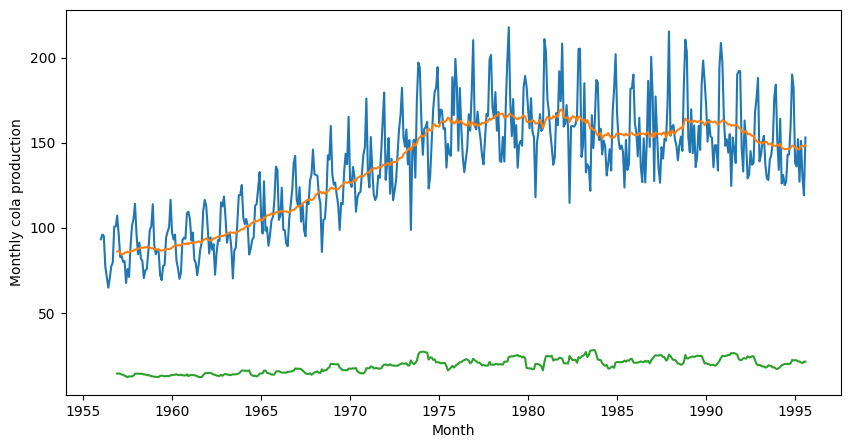

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df['Monthly cola production'])
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)
plt.show()

In [17]:
#Now let us perform the ADF test
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['Monthly cola production'])
print(adfTest) #Let us interpret these values below by converting into a series

(-2.2826614187875816, 0.1776209982913235, 17, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, 3463.9034375936567)


In [18]:
stats= pd.Series(adfTest[0:4], index= ['Test Statistic', 'p-value', '#lags used' , 'number of observations used'])
print(stats)

Test Statistic                  -2.282661
p-value                          0.177621
#lags used                      17.000000
number of observations used    458.000000
dtype: float64


In [19]:
for key, values in adfTest[4].items():
    print('critically', key,":", values)

critically 1% : -3.4447087976702284
critically 5% : -2.867871300049488
critically 10% : -2.5701423432047443


In [32]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    df['rollMean'] = df['Monthly cola production'].rolling(window=12).mean()
    df['rollStd'] = df['Monthly cola production'].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df['Monthly cola production'])
    print(adfTest)

    stats= pd.Series(adfTest[0:4], index= ['Test Statistic', 'p-value', '#lags used' , 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
       print('critically', key,":", values)

    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x=df.index, y=df['Monthly cola production'])
    sns.lineplot(data=df, x=df.index, y=df.rollMean)
    sns.lineplot(data=df, x=df.index, y=df.rollStd)
    plt.show()
    

    
    

In [33]:
air_df = df[['Monthly cola production']].copy() #Double brackets because it is a list within a list
print(air_df.head())

            Monthly cola production
Month                              
1956-01-01                     93.2
1956-02-01                     96.0
1956-03-01                     95.2
1956-04-01                     77.1
1956-05-01                     70.9


In [34]:

air_df['shift'] = air_df['Monthly cola production'].shift(1)
air_df['shiftDiff'] = air_df['Monthly cola production'] - air_df['shift']
print(air_df.head(20))

            Monthly cola production  shift  shiftDiff
Month                                                
1956-01-01                     93.2    NaN        NaN
1956-02-01                     96.0   93.2        2.8
1956-03-01                     95.2   96.0       -0.8
1956-04-01                     77.1   95.2      -18.1
1956-05-01                     70.9   77.1       -6.2
1956-06-01                     64.8   70.9       -6.1
1956-07-01                     70.1   64.8        5.3
1956-08-01                     77.3   70.1        7.2
1956-09-01                     79.5   77.3        2.2
1956-10-01                    100.6   79.5       21.1
1956-11-01                    100.7  100.6        0.1
1956-12-01                    107.1  100.7        6.4
1957-01-01                     95.9  107.1      -11.2
1957-02-01                     82.8   95.9      -13.1
1957-03-01                     83.3   82.8        0.5
1957-04-01                     80.0   83.3       -3.3
1957-05-01                  

(-2.2826614187875816, 0.1776209982913235, 17, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, 3463.9034375936567)
Test Statistic                  -2.282661
p-value                          0.177621
#lags used                      17.000000
number of observations used    458.000000
dtype: float64
critically 1% : -3.4447087976702284
critically 5% : -2.867871300049488
critically 10% : -2.5701423432047443


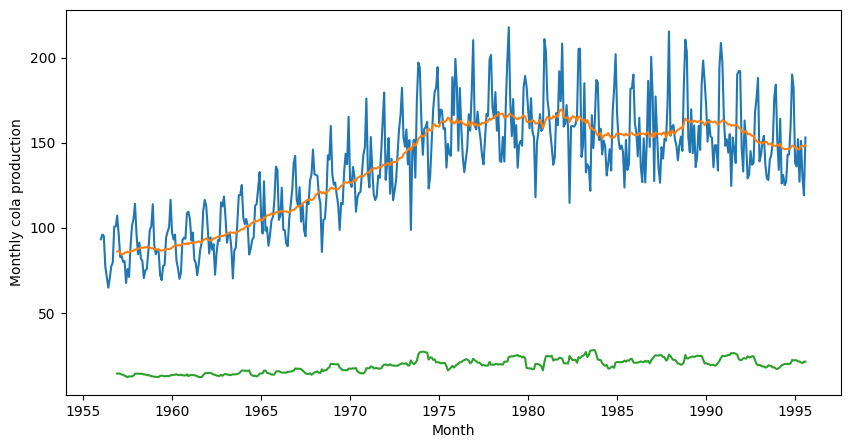

In [37]:
#Test stationarity
test_stationarity(air_df.dropna(), 'shiftDiff')
#p-value is just close to 0.05, sp let us try a shift of 2
import warnings
warnings.filterwarnings('ignore')

In [38]:
air_df['shift'] = air_df['Monthly cola production'].shift(2)
air_df['shiftDiff'] = air_df['Monthly cola production']- air_df['shift']
print(air_df.head(20))

            Monthly cola production  shift  shiftDiff
Month                                                
1956-01-01                     93.2    NaN        NaN
1956-02-01                     96.0    NaN        NaN
1956-03-01                     95.2   93.2        2.0
1956-04-01                     77.1   96.0      -18.9
1956-05-01                     70.9   95.2      -24.3
1956-06-01                     64.8   77.1      -12.3
1956-07-01                     70.1   70.9       -0.8
1956-08-01                     77.3   64.8       12.5
1956-09-01                     79.5   70.1        9.4
1956-10-01                    100.6   77.3       23.3
1956-11-01                    100.7   79.5       21.2
1956-12-01                    107.1  100.6        6.5
1957-01-01                     95.9  100.7       -4.8
1957-02-01                     82.8  107.1      -24.3
1957-03-01                     83.3   95.9      -12.6
1957-04-01                     80.0   82.8       -2.8
1957-05-01                  

(-2.2826614187875816, 0.1776209982913235, 17, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, 3463.9034375936567)
Test Statistic                  -2.282661
p-value                          0.177621
#lags used                      17.000000
number of observations used    458.000000
dtype: float64
critically 1% : -3.4447087976702284
critically 5% : -2.867871300049488
critically 10% : -2.5701423432047443


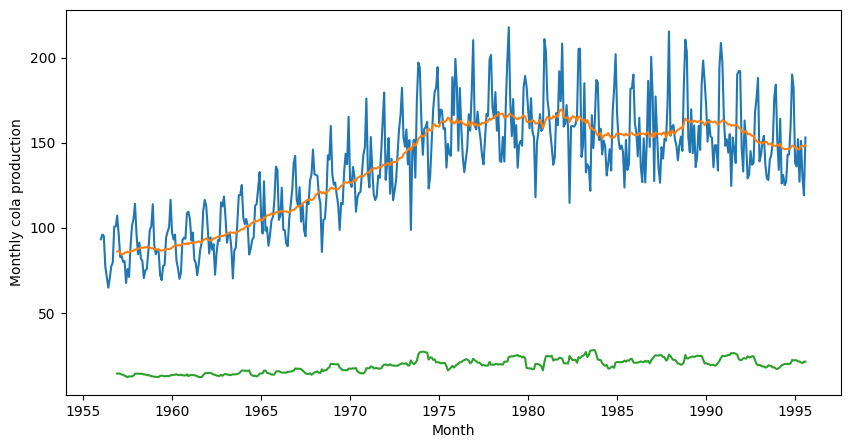

In [39]:
test_stationarity(air_df.dropna(), 'shiftDiff')

In [40]:
air_df['firstDiff'] = air_df['Monthly cola production'].diff()

In [41]:
air_df['firstDiff'] = air_df['Monthly cola production'].diff(12)

In [42]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

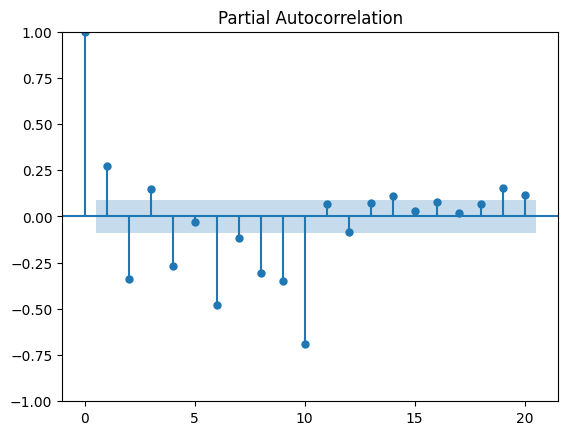

In [44]:
plot_pacf(air_df['shiftDiff'].dropna(),lags=20)
plt.show()

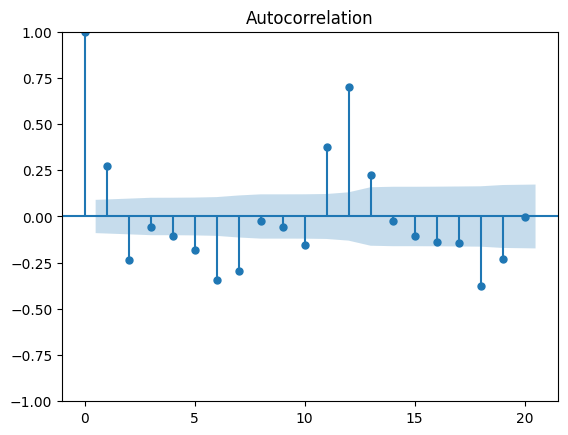

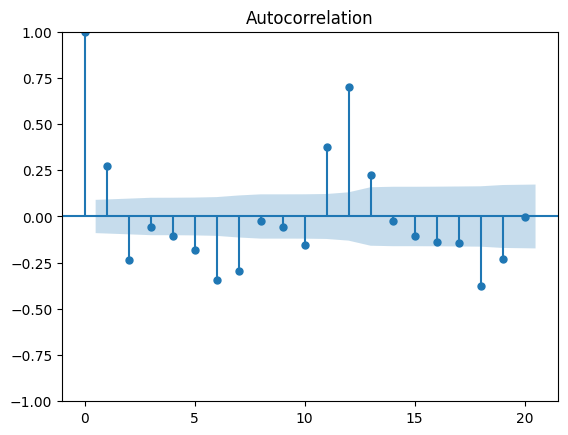

In [45]:
plot_acf(air_df['shiftDiff'].dropna(),lags=20)

In [46]:
#Building arima model
train = air_df[:round(len(air_df*70/100))]
print(train.tail())

            Monthly cola production  shift  shiftDiff  firstDiff
Month                                                           
1995-04-01                    127.0  136.0       -9.0        1.0
1995-05-01                    151.0  152.0       -1.0       20.0
1995-06-01                    130.0  127.0        3.0        5.0
1995-07-01                    119.0  151.0      -32.0       -8.0
1995-08-01                    153.0  130.0       23.0       10.0


In [47]:
test =  air_df[round(len(air_df)*70/100) :]
print(test.head())

            Monthly cola production  shift  shiftDiff  firstDiff
Month                                                           
1983-10-01                    162.8  166.1       -3.3       -2.7
1983-11-01                    186.8  146.8       40.0      -18.2
1983-12-01                    185.5  162.8       22.7      -19.7
1984-01-01                    151.5  186.8      -35.3        9.9
1984-02-01                    158.1  185.5      -27.4       10.0


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
#Now SARIMAX prediction
model= SARIMAX(train['Monthly cola production'], order=(1,2,1), seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['sarimaxPred'] = prediction
print(air_df.tail())
#data looks better


            Monthly cola production  shift  shiftDiff  firstDiff  sarimaxPred
Month                                                                        
1995-04-01                    127.0  136.0       -9.0        1.0   131.324625
1995-05-01                    151.0  152.0       -1.0       20.0   124.918740
1995-06-01                    130.0  127.0        3.0        5.0   131.225358
1995-07-01                    119.0  151.0      -32.0       -8.0   137.978434
1995-08-01                    153.0  130.0       23.0       10.0   139.784419


            Monthly cola production  shift  shiftDiff  firstDiff  sarimaxPred
Month                                                                        
1956-01-01                     93.2    NaN        NaN        NaN          NaN
1956-02-01                     96.0    NaN        NaN        NaN          NaN
1956-03-01                     95.2   93.2        2.0        NaN          NaN
1956-04-01                     77.1   96.0      -18.9        NaN          NaN
1956-05-01                     70.9   95.2      -24.3        NaN          NaN


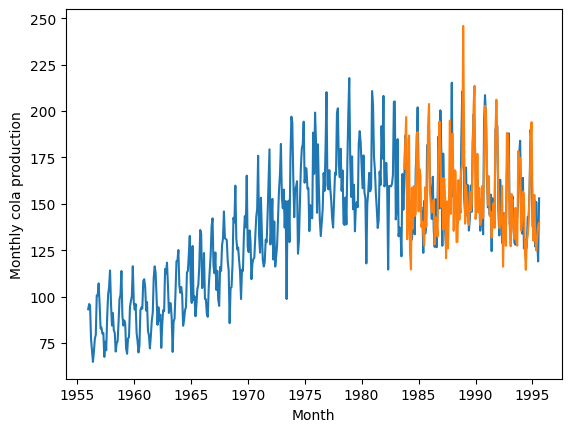

In [51]:
#plot
air_df.dropna()
print(air_df.head())
sns.lineplot(data=air_df, x=air_df.index, y= 'Monthly cola production')
sns.lineplot(data=air_df,x=air_df.index,y='sarimaxPred')
#sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')
plt.show()

In [52]:
#Compared to ARIMA<SARIMAX is much better
#Future prediction: First check the last date in our dataset
print(air_df.tail())

            Monthly cola production  shift  shiftDiff  firstDiff  sarimaxPred
Month                                                                        
1995-04-01                    127.0  136.0       -9.0        1.0   131.324625
1995-05-01                    151.0  152.0       -1.0       20.0   124.918740
1995-06-01                    130.0  127.0        3.0        5.0   131.225358
1995-07-01                    119.0  151.0      -32.0       -8.0   137.978434
1995-08-01                    153.0  130.0       23.0       10.0   139.784419


In [53]:
#MS: Month Start frequency
#Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01',
end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [54]:
#Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

1961-01-01     95.093024
1961-02-01     90.881896
1961-03-01    100.173708
1961-04-01     86.853769
1961-05-01     75.226499
1961-06-01     71.567770
1961-07-01     78.049084
1961-08-01     94.028894
1961-09-01     96.753547
1961-10-01     84.779714
1961-11-01    112.983790
1961-12-01    125.615022
1962-01-01    110.846435
1962-02-01     90.330711
1962-03-01     90.518979
1962-04-01     75.380121
1962-05-01     80.036636
1962-06-01     81.470822
1962-07-01     83.637768
1962-08-01     95.533278
1962-09-01     98.350867
1962-10-01    103.563234
1962-11-01    120.692263
1962-12-01    114.073888
Freq: MS, Name: predicted_mean, dtype: float64


In [56]:
air_df['arimaPred'] = prediction

In [58]:
#Now SARIMAX prediction
model = SARIMAX(train['Monthly cola production'],order=(1,1,1),seasonal_order=(3,1,3,12))
model_fit= model.fit()
prediction =model_fit.prediction(start=test.index[0],end=test.index[-1])
df['sarimaxPred'] = prediction
print(df.tail())
#Data looks better

AttributeError: 'SARIMAXResults' object has no attribute 'prediction'

In [ ]:
#Plot
df.dropna()
print(df.head())